In [18]:
!pip3 install arviz
import arviz as az

!pip3 install numpyro
import numpyro
import numpyro.distributions as dist
from numpyro.diagnostics import print_summary
from numpyro.infer import Predictive, SVI, Trace_ELBO
from numpyro.infer.autoguide import AutoLaplaceApproximation
import jax
import jax.numpy as jnp
from jax import grad, jit, vmap, pmap, jacfwd, jacrev
from jax.random import PRNGKey as PK

import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Load and stdize data

In [2]:
d = pd.read_csv('https://raw.githubusercontent.com/fehiepsi/rethinking-numpyro/master/data/Howell1.csv', delimiter=';')
print(d.info())
d.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB
None


,height,weight,age,male
count,544.000000,544.000000,544.000000,544.000000
mean,138.263596,35.610618,29.344393,0.472426
std,27.602448,14.719178,20.746888,0.499699
min,53.975000,4.252425,0.000000,0.000000
25%,125.095000,22.007717,12.000000,0.000000
50%,148.590000,40.057844,27.000000,0.000000
75%,157.480000,47.209005,43.000000,1.000000
max,179.070000,62.992589,88.000000,1.000000


In [11]:
ad = d['age'] >= 18
stdize = lambda x: ((x - x.mean())/ x.std()).to_numpy()
A = stdize(d['age'][ad])
H = stdize(d['height'][ad])
W = stdize(d['weight'][ad])
S = d['male'][ad].to_numpy()

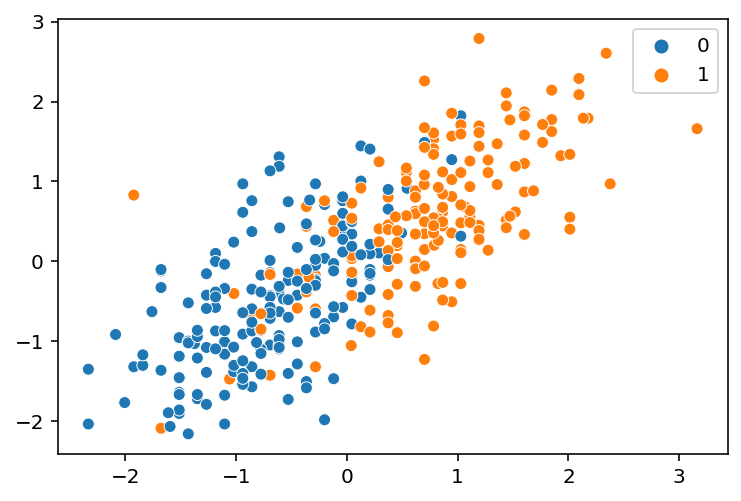

In [16]:
sns.scatterplot(x=H,y=W,hue=S)

# Scientific Model

In [19]:
?Predictive

In [ ]:
def model(*args, **kwargs):
    pass